In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data =  pd.read_csv('Iris.csv')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.columns = data.columns.str.strip().str.lower()
print(data['species'].unique())


['setosa' 'versicolor' 'virginica']


In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
x = data.iloc[:,1:5]
y = data.iloc[:,5:]

In [28]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y = encode.fit_transform(data['species'])
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Features and target
X = data.drop(columns='species')
y = LabelEncoder().fit_transform(data['species'])

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

# Predict
pred = naive_bayes.predict(x_test)
print(pred)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [35]:
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [36]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [37]:
matrix =  confusion_matrix(y_test,pred,labels = naive_bayes.classes_)
print(matrix)

tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


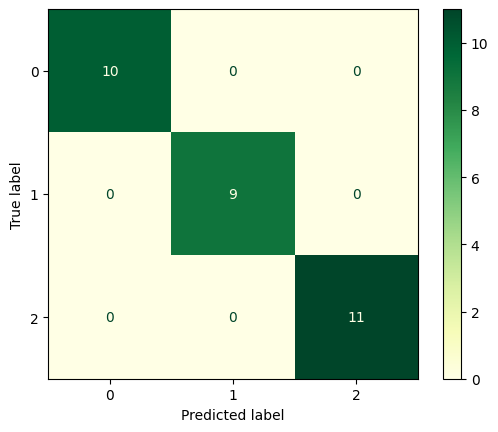

In [38]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=naive_bayes.classes_)
conf_matrix.plot(cmap=plt.cm.YlGn)
plt.show()

In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [40]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,pred)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))


Accuracy: 1.00
Error Rate:  0.0
Sensitivity (Recall or True positive rate) : 1.0
Specificity (True negative rate) : 1.0
Precision (Positive predictive value) : 1.0
False Positive Rate : 0.0
